<a href="https://colab.research.google.com/github/mohorka/Intelligent_System/blob/main/Pandas%26DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

#### ~~1. Вывести: кол-во наблюдений в датасете~~
#### ~~2. Вывести названия столбцов~~
#### 3. Определить самую частую позицию (item) в заказе
#### 4. Построить гистрограмму частоты заказов по позициям (item )
#### ~~5. Измените тип переменной item_price c с помощью лямбды функции~~
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
#### ~~7. Средняя сумма заказа? (минимум 2 способа)~~
#### ~~8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе~~
#### ~~9. Определить статистику заказов стейков, а также статистику заказов прожарки.~~
#### ~~10. Добавить новый столбец цен на каждую позицию в заказе в рублях.~~
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### ~~12. Определить цену по каждой позиции в отдельности.~~


In [ ]:
import warnings
warnings.filterwarnings('ignore')

Сначала нужно поменять цены, потом уже убрать добавки из названия


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t' )

In [ ]:
#change data type of item_price
data['item_price'] = data.apply(lambda x: float(x['item_price'].replace('$', '')),axis=1)

In [ ]:
data.head()

In [ ]:
data.shape

(4621, 5)

In [ ]:
#names of columns
data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [ ]:
#fix of data
#data.loc[data['item_price'] == 1.99] = data.loc[data['item_price'] == 1.99].replace({1.99:2.15},inplace=True)
data.drop(index = 4509, inplace = True)

In [ ]:
#get adds
adds = []
for index, row in data.iterrows():
  if ' and ' in row['item_name'].lower():
    items = row['item_name'].split(' and ')
    copy = row
    #print(copy['item_name'])
    #print(row['item_name'])
    row['item_name']=row['item_name'].replace(row['item_name'],items[0])
    #print(row['item_name'])
    copy['item_name'] = items[-1]
    copy['item_price'] = 0.0
    adds.append(copy)

data.head()

AttributeError: ignored

In [ ]:
separ_data = pd.DataFrame(adds,columns=data.columns)
separ_data['order_id'] = data.apply(lambda x: int(x['order_id']),axis=1)
separ_data['quantity'] = data.apply(lambda x: int(x['quantity']),axis=1)
separ_data

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Fresh Tomato Salsa,NaN,0.0
3,1,1,Tomatillo-Green Chili Salsa,NaN,0.0
10,5,1,Guacamole,NaN,0.0
14,7,1,Guacamole,NaN,0.0
15,8,1,Tomatillo-Green Chili Salsa,NaN,0.0
...,...,...,...,...,...
4466,1779,1,Tomatillo Red Chili Salsa,NaN,0.0
4476,1784,1,Tomatillo Green Chili Salsa,NaN,0.0
4489,1786,4,Guacamole,NaN,0.0
4493,1787,1,Tomatillo Green Chili Salsa,NaN,0.0


In [ ]:
data.loc[data['item_name'].str.contains(' and ')]['item_price'].unique()

array([ 2.39,  4.45,  2.95,  3.99,  5.9 ,  3.  ,  4.  ,  2.29,  8.9 ,
        3.89, 11.8 ,  4.78, 13.35,  7.17,  7.98, 44.25,  8.5 , 17.8 ])

In [ ]:
data.head(20)

In [ ]:
#number of orders
len(data['order_id'].value_counts().values)

1834

In [ ]:
#the most popular item
data['item_name'].value_counts(normalize = True).index.tolist()[0]

'Chicken Bowl'

In [ ]:
#different price for the same product))0))))
data.loc[data['item_name'] == 'Chips']['item_price'].unique()

array([2.15, 4.3 , 6.45, 1.99])

In [ ]:
#fix of data
data.loc[data['item_price'] == 1.99] = data.loc[data['item_price'] == 1.99].replace({1.99:2.15},inplace=True)


array([2.15, 4.3 , 6.45])

In [ ]:
price = pd.to_numeric(data['item_price'])
quantity = pd.to_numeric(data['quantity'])
data['order_value'] = price*quantity
#data.head()

In [ ]:
#full value of order
data.groupby('order_id').sum()

In [ ]:
data['item_name'].unique()


In [ ]:
# get mean
data.groupby('order_id')['item_price'].sum().mean()
#data['item_price'].sum() / data['order_id'].max()

18.81142857142869

In [ ]:
data.groupby('order_id')['item_price'].agg(['sum', 'mean'])

,sum,mean
order_id,,
1,11.56,2.890000
2,16.98,16.980000
3,12.67,6.335000
4,21.00,10.500000
5,13.70,6.850000
...,...,...
1830,23.00,11.500000
1831,12.90,4.300000
1832,13.20,6.600000


In [ ]:
# mean, min, max, etc. about orders
data.groupby('order_id').describe()

quantity                      ... item_price                                 
            count mean  std  min  25%  ...        min      25%     50%      75%    max
order_id                               ...                                            
1             4.0  1.0  0.0  1.0  1.0  ...       2.39   2.3900   2.890   3.3900   3.39
2             1.0  2.0  NaN  2.0  2.0  ...      16.98  16.9800  16.980  16.9800  16.98
3             2.0  1.0  0.0  1.0  1.0  ...       1.69   4.0125   6.335   8.6575  10.98
4             2.0  1.0  0.0  1.0  1.0  ...       9.25   9.8750  10.500  11.1250  11.75
5             2.0  1.0  0.0  1.0  1.0  ...       4.45   5.6500   6.850   8.0500   9.25
...           ...  ...  ...  ...  ...  ...        ...      ...     ...      ...    ...
1830          2.0  1.0  0.0  1.0  1.0  ...      11.25  11.3750  11.500  11.6250  11.75
1831          3.0  1.0  0.0  1.0  1.0  ...       1.50   1.8250   2.150   5.7000   9.25
1832          2.0  1.0  0.0  1.0  1.0  ...       4.45   5.5250   6.600   7.6750   8.75
1833          2.0  1.0  0.0  1.0  1.0  ...      11.75  11.7500  11.750  11.7500  11.75
1834          3.0  1.0  0.0  1.0  1.0  ...       8.75   8.7500   8.750  10.0000  11.25

[1834 rows x 16 columns]

In [ ]:
#statistics for steaks
steaks = data.loc[data['item_name'].str.contains('Steak')]
steaks.groupby('item_name')['quantity','item_price'].describe()

quantity                      ... item_price              
                      count      mean       std  ...        50%    75%    max
item_name                                        ...                         
Steak Bowl            211.0  1.047393  0.234278  ...       9.25  11.75  26.07
Steak Burrito         368.0  1.048913  0.239889  ...       9.25  11.75  27.75
Steak Crispy Tacos     35.0  1.028571  0.169031  ...       9.25  11.75  17.98
Steak Salad             4.0  1.000000  0.000000  ...       8.99   8.99   8.99
Steak Salad Bowl       29.0  1.068966  0.257881  ...      11.89  11.89  23.78
Steak Soft Tacos       55.0  1.018182  0.134840  ...       9.25   9.25  18.50

[6 rows x 16 columns]

In [ ]:
#add price in rub
exchange = 71.55
data['r_price'] = [x*71.55 for x in data['item_price']]
data.head()

,order_id,quantity,item_name,choice_description,item_price,r_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,171.0045
1,1,1,Izze,[Clementine],3.39,242.5545
2,1,1,Nantucket Nectar,[Apple],3.39,242.5545
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,171.0045
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1214.9190


In [ ]:
steaks_mild = steaks[steaks['choice_description'].str.contains('Mild')]
steaks_medium = steaks[steaks['choice_description'].str.contains('Medium')]
steaks_hot = steaks[steaks['choice_description'].str.contains('Hot')]

In [ ]:
steaks_mild.groupby('choice_description')['quantity','item_price'].describe()

quantity       ... item_price       
                                                      count mean  ...        75%    max
choice_description                                                ...                  
[Fresh Tomato (Mild), [Black Beans, Guacamole, ...      1.0  1.0  ...      11.08  11.08
[Fresh Tomato (Mild), [Guacamole, Lettuce, Pint...      2.0  1.0  ...      11.08  11.08
[Fresh Tomato (Mild), [Lettuce, Black Beans, Ri...      1.0  1.0  ...       8.69   8.69
[Fresh Tomato (Mild), [Lettuce, Black Beans, Ri...      1.0  1.0  ...       8.69   8.69
[Fresh Tomato (Mild), [Lettuce, Cheese]]                1.0  1.0  ...       8.69   8.69
...                                                     ...  ...  ...        ...    ...
[[Roasted Chili Corn Salsa (Medium), Fresh Toma...      1.0  1.0  ...      11.48  11.48
[[Roasted Chili Corn Salsa (Medium), Tomatillo-...      2.0  1.0  ...       8.99   8.99
[[Roasted Chili Corn Salsa (Medium), Tomatillo-...      1.0  1.0  ...       8.99   8.99
[[Roasted Chili Corn Salsa (Medium), Tomatillo-...      1.0  1.0  ...       8.99   8.99
[[Tomatillo-Red Chili Salsa (Hot), Fresh Tomato...      1.0  1.0  ...       8.99   8.99

[72 rows x 16 columns]

In [ ]:
steaks_medium.groupby('choice_description')['quantity','item_price'].describe()

In [ ]:
steaks_hot.groupby('choice_description')['quantity','item_price'].describe()

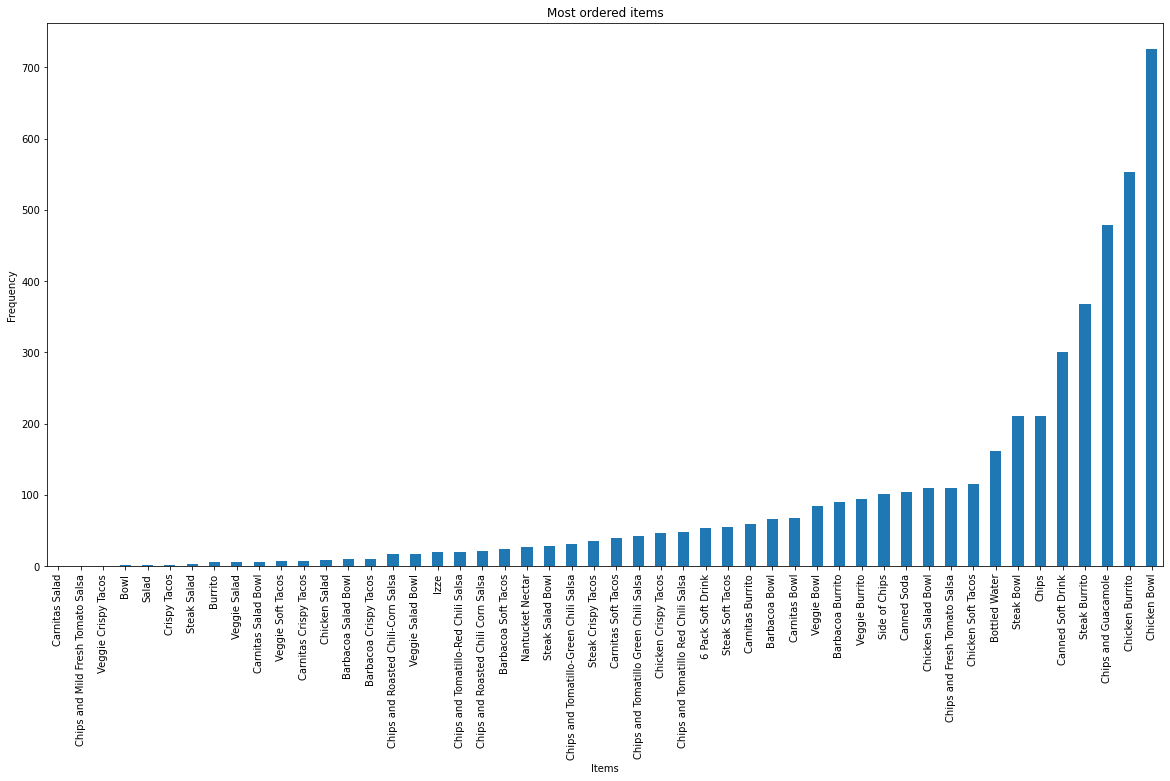

In [ ]:
items = Counter(data.item_name)
df = pd.DataFrame.from_dict(items, orient='index')
df = df[0].sort_values(ascending=True)
df.plot(kind='bar', figsize=(20,10))
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Most ordered items')
plt.show()

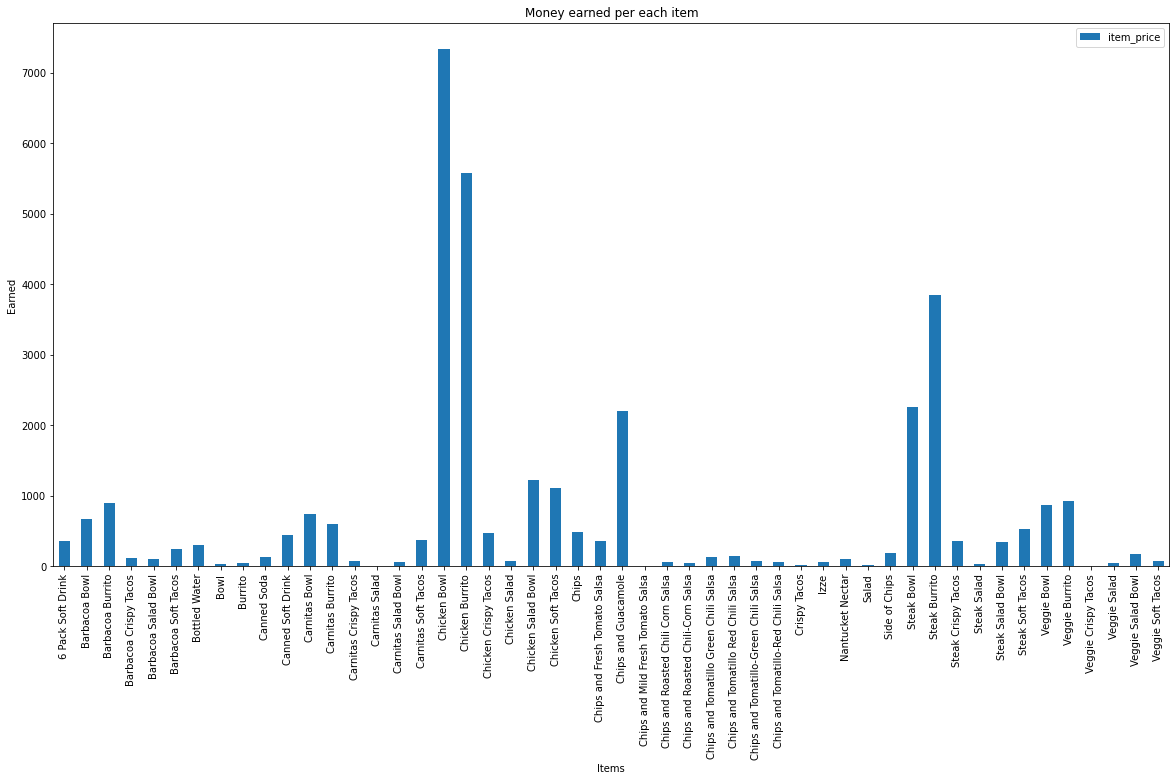

In [ ]:
df = data[['item_name','item_price']]
df = df.groupby('item_name').sum()
#df = df[0].sort_values(ascending=True)
df.plot(kind='bar', figsize=(20,10))
plt.xlabel('Items')
plt.ylabel('Earned')
plt.title('Money earned per each item')
plt.show()


In [ ]:
data['order_id'].groupby(data['item_name']).head()

0          1
1          1
2          1
3          1
4          2
        ... 
3363    1349
3471    1395
3502    1406
3749    1499
3750    1500
Name: order_id, Length: 228, dtype: int64

In [ ]:
string = 'Chips and Tomatillo Green Chili Salsa'
string = string.lower()
if 'and' in string:
 items = string.split(' and ')

l[-1]

'tomatiandllo green chili salsa'

### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.